In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [2]:
# Load your training data set and test data
dt_train = pd.read_csv('Diabetes_training.csv')
dt_test = pd.read_csv('Diabetes_Xtest.csv')

In [3]:
# Split training data into X and y
Xt=dt_train.drop('diabetes',axis=1)
yt=(dt_train['diabetes']=='pos')+0

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in Xt.columns:
    Xt[i]=scaler.fit_transform(Xt[[i]]).ravel()
    dt_test[i]=scaler.transform(dt_test[[i]]).ravel()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xt, yt, test_size = 0.3, random_state=20) 

### Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=30)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=30)

In [7]:
pred_train=clf.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data. 

In [8]:
# Print accuracy, precision and recall for the predictions made on the training data.
print('Precision is',precision_score(y_train,pred_train))
print('Recall is',recall_score(y_train,pred_train))
print('Accuracy is',accuracy_score(y_train,pred_train))

Precision is 1.0
Recall is 1.0
Accuracy is 1.0


In [9]:
pred_val=clf.predict(X_val)
pred_val_prob=clf.predict_proba(X_val)

In [10]:
### WRITE CODE HERE ###
print('Precision is',precision_score(y_val,pred_val))
print('Recall is',recall_score(y_val,pred_val))
print('Accuracy is',accuracy_score(y_val,pred_val))

Precision is 0.532258064516129
Recall is 0.6346153846153846
Accuracy is 0.7225433526011561


Plot ROC curve and obtain AUC for predictions on the validation data.

AUC: 0.697


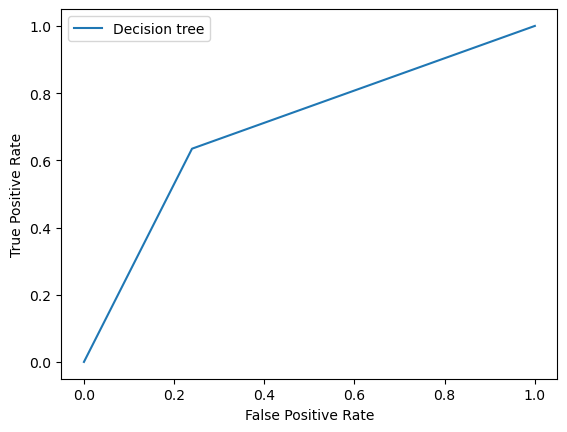

In [11]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
fpr, tpr, _ = roc_curve(y_val, pred_val_prob[:,1])
auc = metrics.roc_auc_score(y_val, pred_val_prob[:,1])
print('AUC: %.3f' % auc)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The model has high variance and low bias (overfitting) as seen from the large difference between the training and validation metrics and near perfect training metrics.

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=30)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=30)

In [13]:
rf_pred_train=rf.predict(X_train)

In [14]:
print('Precision is',precision_score(y_train,rf_pred_train))
print('Recall is',recall_score(y_train,rf_pred_train))
print('Accuracy is',accuracy_score(y_train,rf_pred_train))

Precision is 1.0
Recall is 1.0
Accuracy is 1.0


In [15]:
rf_val=rf.predict(X_val)
rf_val_prob=rf.predict_proba(X_val)

In [16]:
print('Precision is',precision_score(y_val,rf_val))
print('Recall is',recall_score(y_val,rf_val))
print('Accuracy is',accuracy_score(y_val,rf_val))

Precision is 0.6
Recall is 0.6923076923076923
Accuracy is 0.7687861271676301


AUC: 0.844


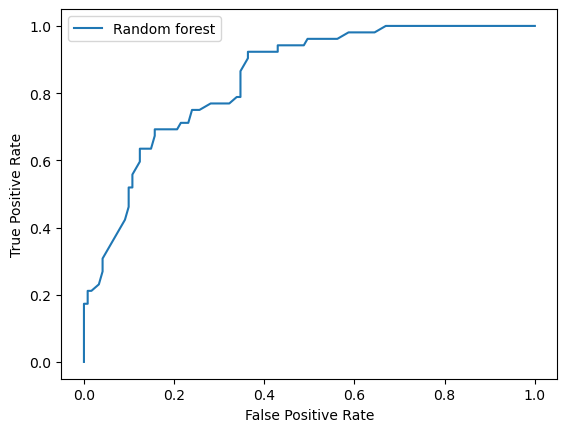

In [17]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
fpr, tpr, thresholds = roc_curve(y_val, rf_val_prob[:,1])
auc = metrics.roc_auc_score(y_val, rf_val_prob[:,1])
print('AUC: %.3f' % auc)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The random forest still has relatively high variance and low bias, but seems to have lesser variance due to bagging as compared to the decision tree model. Random forest is objectively better than the decision tree as seen from the validation score. Since there is large variance and overfitting, the random forest performs better as it tends to reduce the variance through bagging.

## Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'max_depth': [None,10,25],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,4,6],
    'n_estimators': [25,50,100]
}

In [20]:
rf = RandomForestClassifier(random_state=30)

In [21]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [22]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 25],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [25, 50, 100]},
             scoring='recall', verbose=2)

In [23]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 50}

In [24]:
grid_search.best_score_

0.657687074829932

In [25]:
final=grid_search.best_estimator_
pred_train=final.predict(X_train)
print('Training:')
print('Precision is',precision_score(y_train,pred_train))
print('Recall is',recall_score(y_train,pred_train))
print('Accuracy is',accuracy_score(y_train,pred_train))

print('\n')
print('Validation:')
pred_val=final.predict(X_val)
pred_val_prob=final.predict_proba(X_val)
print('Precision is',precision_score(y_val,pred_val))
print('Recall is',recall_score(y_val,pred_val))
print('Accuracy is',accuracy_score(y_val,pred_val))

Training:
Precision is 0.9527027027027027
Recall is 0.9463087248322147
Accuracy is 0.9627791563275434


Validation:
Precision is 0.576271186440678
Recall is 0.6538461538461539
Accuracy is 0.7514450867052023


AUC: 0.838


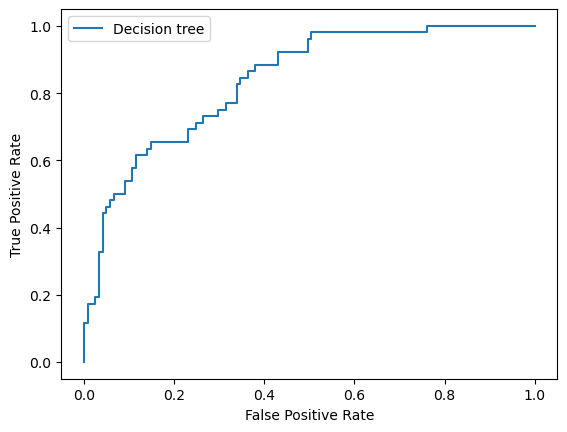

In [26]:
fpr, tpr, thresholds = roc_curve(y_val, pred_val_prob[:,1])
auc = metrics.roc_auc_score(y_val, pred_val_prob[:,1])
print('AUC: %.3f' % auc)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [27]:
# Construct your final random forest using the best hyperparameters obtained above

# return the prediction as "y_pred2"
y_pred2=final.predict(dt_test)